In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# General overview

Diverse Generative ML Benchmark (DIGEN) is a collection of datasets differentiating top ML methods, a PyPI package to simplify benchmarking and a Docker container for reproducibility of the results. 

In this tutorial we will show some basic commands and will demonstrate how to use the package, inspect datasets in more details and benchmark your methods against DIGEN.

In [2]:
#Import a package and initialize the benchmark
from digen import Benchmark
benchmark=Benchmark()

In [3]:
#Show which methods were benchmarked
benchmark.list_methods()

['DecisionTreeClassifier',
 'GradientBoostingClassifier',
 'KNeighborsClassifier',
 'LGBMClassifier',
 'LogisticRegression',
 'RandomForestClassifier',
 'SVC',
 'XGBClassifier']

In [4]:
#Check the datasets included in the release. Note that the datasets come in the following format:
#digen[NUMBER]_[SEED], where:
#NUMBER - is an identifier of a dataset, and 
#SEED - a random seed used to generate the dataset
benchmark.list_datasets()

['digen8_4426',
 'digen32_5191',
 'digen39_5578',
 'digen36_466',
 'digen13_769',
 'digen35_4426',
 'digen1_6265',
 'digen10_8322',
 'digen23_5191',
 'digen22_2433',
 'digen24_2433',
 'digen3_769',
 'digen17_6949',
 'digen26_7270',
 'digen7_6949',
 'digen16_5390',
 'digen27_860',
 'digen37_769',
 'digen12_8322',
 'digen6_466',
 'digen25_2433',
 'digen34_769',
 'digen31_2433',
 'digen33_769',
 'digen38_4426',
 'digen28_769',
 'digen40_5390',
 'digen2_6949',
 'digen4_860',
 'digen14_769',
 'digen29_8322',
 'digen21_6265',
 'digen15_5311',
 'digen19_7270',
 'digen5_6949',
 'digen11_7270',
 'digen9_7270',
 'digen20_5191',
 'digen18_5578',
 'digen30_4426']

In [5]:
#Show how the ground truth (i.e. how the endpoint of each of the datasets was created)
benchmark.get_models()

{'digen8_4426': 'safeDiv(X0, mul(X5, X2))',
 'digen32_5191': 'mul(X3, mul(X1, min(X9, X6)))',
 'digen39_5578': 'lt(mul(X7, X9), mul(X4, X0))',
 'digen36_466': 'ne(lt(X5, X3), gt(X6, X8))',
 'digen13_769': 'le(add(mul(X7, X9), mul(1.0, mul(X0, X8))), safeDiv(gt(min(sub(X1, X7), mul(safeDiv(X4, X9), sub(X1, X3))), le(X2, safeDiv(X5, eq(X8, X8)))), X0))',
 'digen35_4426': 'safeDiv(add(X7, lt(X6, safeDiv(0.0, X5))), safeDiv(X0, safeDiv(1.0, X8)))',
 'digen1_6265': 'lt(add(add(X2, X9), safeDiv(X7, 1.0)), X1)',
 'digen10_8322': 'mul(ne(X0, 1.0), eq(lt(X9, X2), lt(X5, X0)))',
 'digen23_5191': 'safeDiv(mul(safeDiv(X1, le(X9, X9)), X7), X3)',
 'digen22_2433': 'le(eq(X6, X0), safeDiv(X4, X3))',
 'digen24_2433': 'safeDiv(safeDiv(X0, X2), min(X4, X8))',
 'digen3_769': 'ge(sub(X4, X7), sub(X8, X5))',
 'digen17_6949': 'safeDiv(sub(add(X3, 0.0), safeDiv(X7, X5)), X3)',
 'digen26_7270': 'mul(min(X1, X7), safeDiv(X6, X8))',
 'digen7_6949': 'safeDiv(X0, safeDiv(X5, X8))',
 'digen16_5390': 'ne(lt(X3, X9)

# Loading a dataset

Let's load a sample DIGEN dataset. 
The following command automatically downloads the given datasets in Pandas format and stores it in a local folder.

In [6]:
df=benchmark.load_dataset( 'digen20_5191')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,target
0,-0.052213,0.338963,-2.827544,0.224669,-1.809094,0.290121,0.833601,1.787578,1.190428,-0.699816,0
1,-0.324563,-0.271444,-1.047632,-2.153546,1.142021,0.615576,-1.098690,0.186790,-0.999461,-0.871202,0
2,0.595829,0.082149,-0.036141,-1.536773,-0.610730,0.149693,0.013667,2.191303,-0.036883,-0.367450,0
3,-1.094319,-0.622439,0.428078,1.641097,-1.912682,-0.409450,0.022356,-0.883685,-1.043096,0.967930,1
4,-0.361955,1.685080,-0.820187,-0.074589,-0.482351,-0.381627,2.524568,0.054192,-0.506637,0.381859,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716340,-0.714399,0.748550,-1.283548,-0.631484,-0.234274,0.739979,-0.928417,1.112613,1.917807,1
996,1.950721,-0.698522,-0.117313,0.221830,-0.708613,1.713612,0.326507,2.796499,-0.464710,1.098533,0
997,0.036845,-1.445746,-1.123446,0.408288,0.910793,-0.100579,-1.512121,1.671752,0.021630,-0.386320,1
998,-0.579859,-0.475577,-2.012773,0.365128,0.855853,1.382227,-0.173527,-2.134285,0.008291,0.506854,1


The dataset could be used later for building/training/validating any model.

In order to generate a dataset of any size using the predefined function, please use our Docker container, available at GitHub.

# Exploring DIGEN

Now let's take a look at the datasets and the performance of the methods using a heatmap and parallel coordinate plots.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


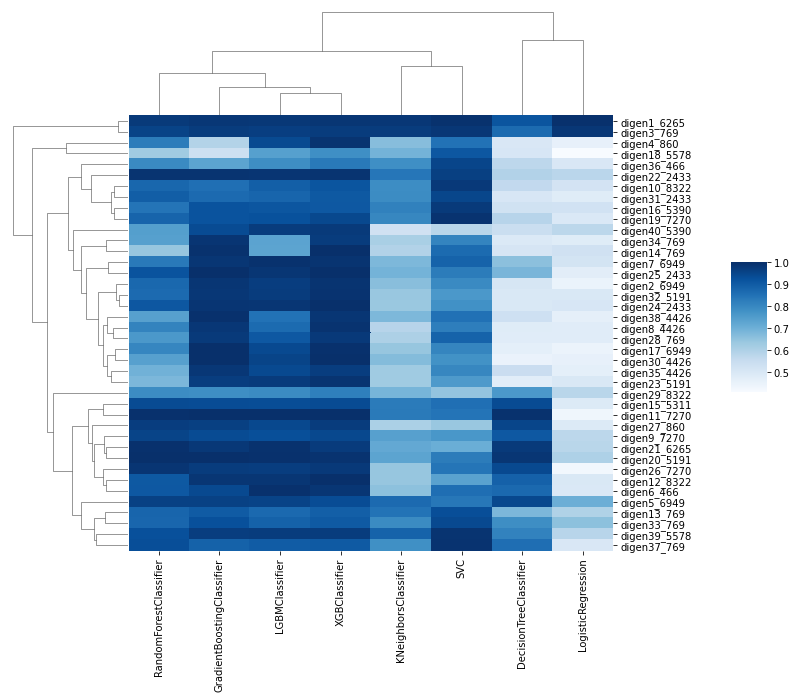

In [7]:
fig=benchmark.plot_heatmap()
#plt.savefig('heatmap.eps', bbox_inches='tight')

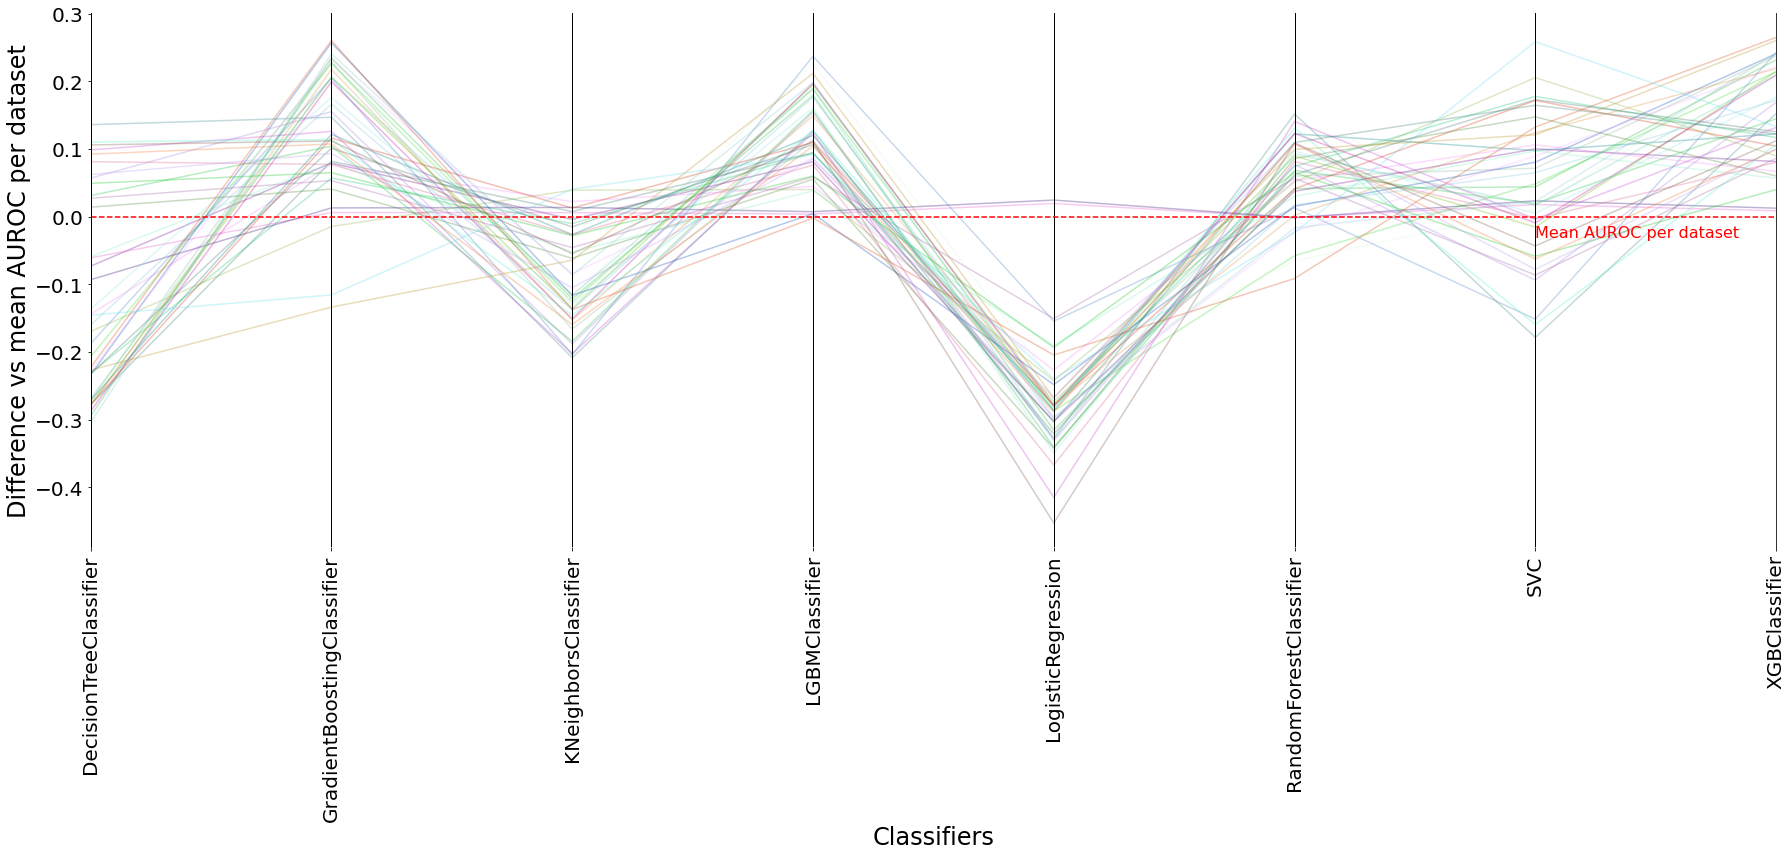

In [8]:
fig, ax=benchmark.plot_parallel_coordinates()
#plt.savefig('parallel.eps', bbox_inches='tight')

We can further investigate interesting dataset(s) by subsetting them using a single dataset or a list of datasets. 
Notice different ways you may refer to the dataset: by its number (15), short name (digen19) or full name (digen5_6949).

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


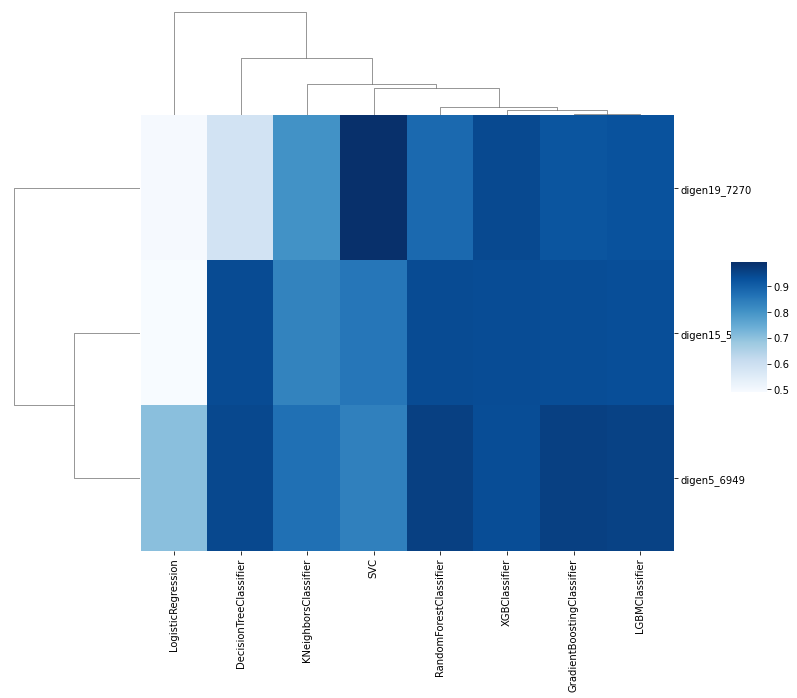

In [9]:
fig, ax=benchmark.plot_heatmap(datasets=[15,'digen19','digen5_6949'])

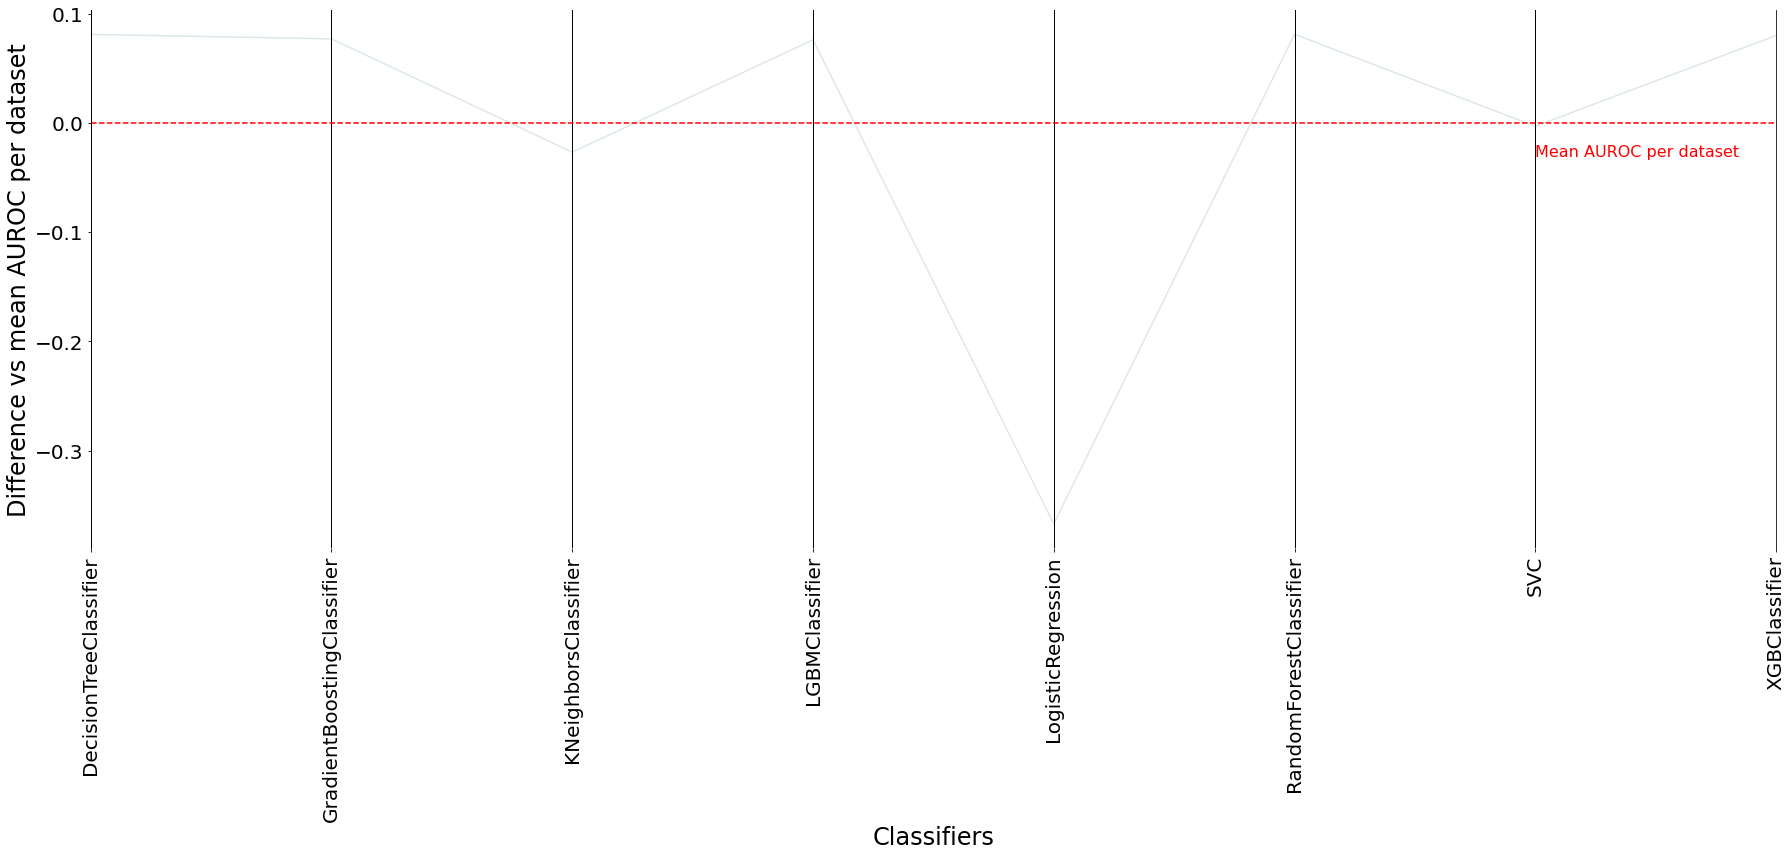

In [10]:
fig, ax=benchmark.plot_parallel_coordinates(datasets='digen15_5311')

We can investigate Receiver Operating Characteristic and Precision-Recall curves for a given dataset for the methods 

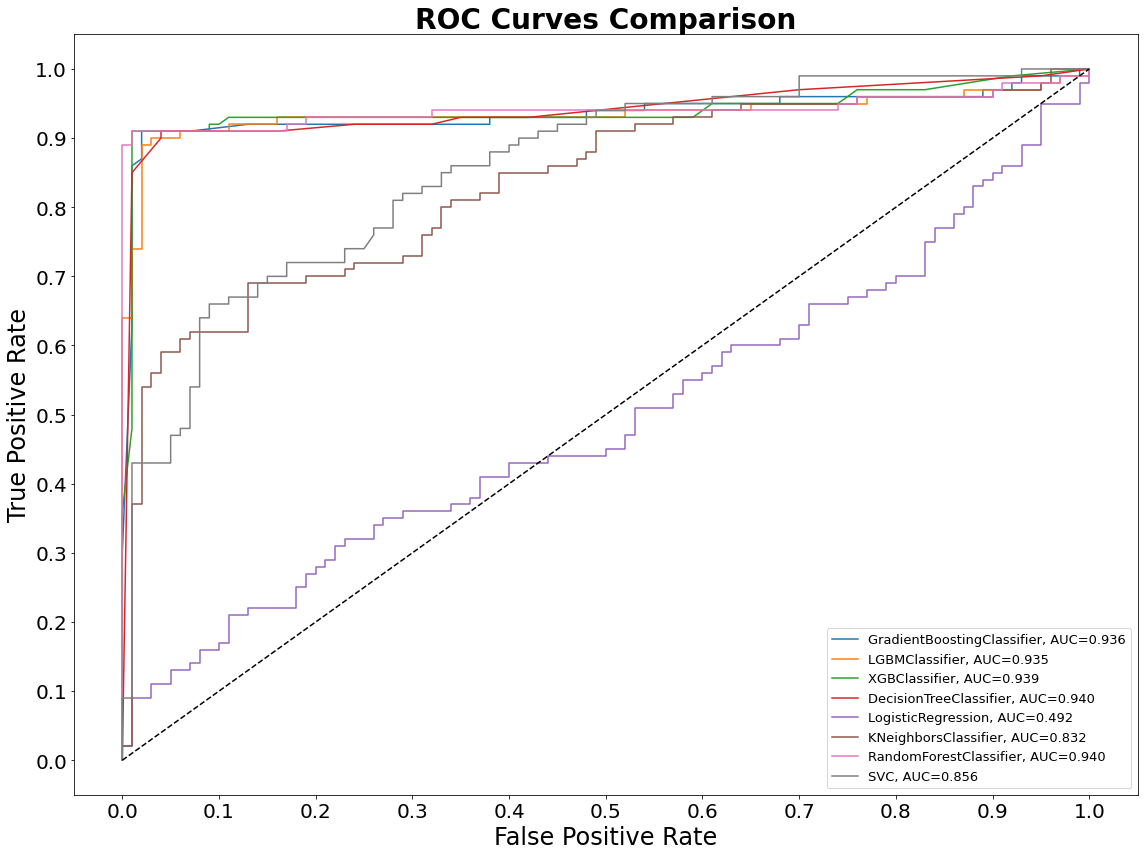

In [11]:
fig,ax=benchmark.plot_roc(dataset_name='digen15_5311')

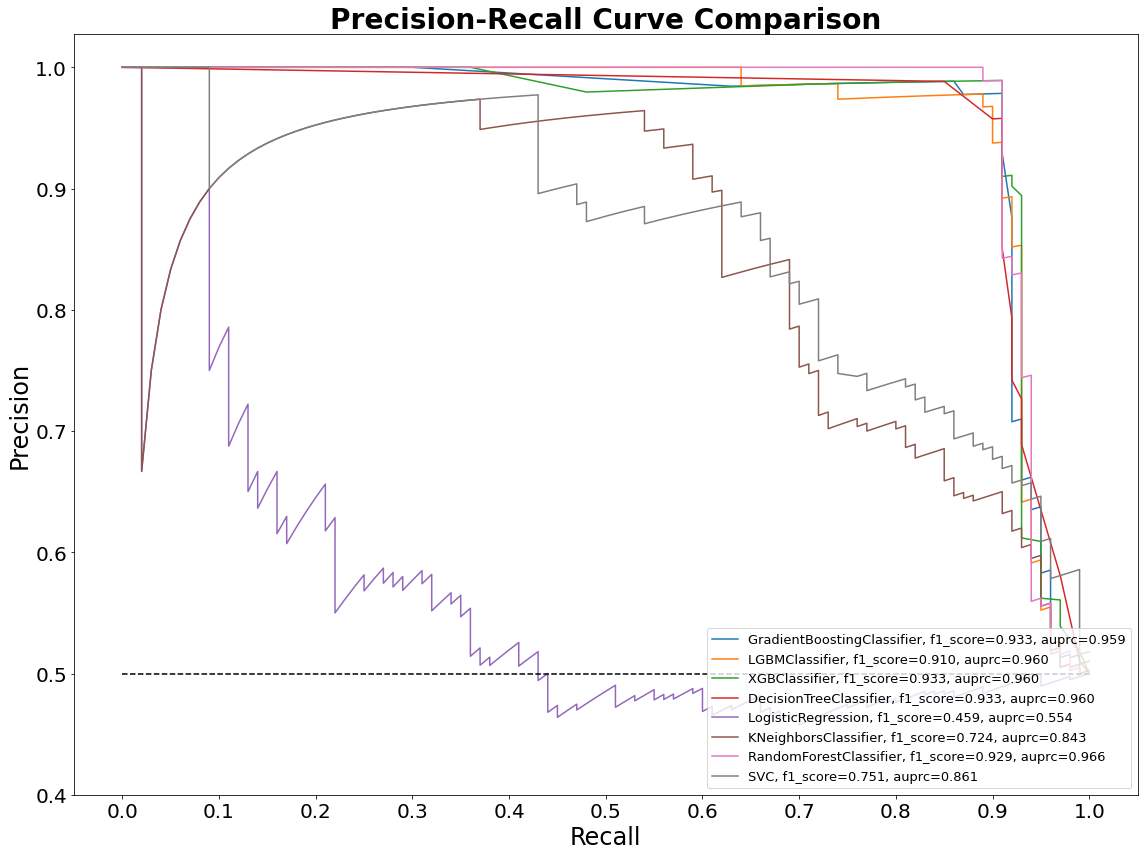

In [12]:
fig,ax=benchmark.plot_prc(dataset_name='digen15_5311')

The default charts could be modified using Matplotlib API (for the reference, visit our advanced tutorial).

# Benchmarking vs DIGEN

The main focus of DIGEN is benchmarking.

The classical use case is to validate the performance of a given novel method on DIGEN benchmark.
In this example we will benchmark a new method (ExtraTreesClassifier) on DIGEN benchmark. DIGEN greatly simplifies the process and allows to do all the benchmarking with a single command.

Please notice, if the reproducibility of your experiment is important, use the provided Docker container and uncomment the line dedicated for benchmarking. 


In [13]:
from sklearn.ensemble import ExtraTreesClassifier
est=ExtraTreesClassifier(n_estimators=10)


Here we evaluate a method with default parameters on one of the datasets. 
No optimization is performed, just checking the performance.    

In [14]:
results=benchmark.evaluate(est=est,datasets='digen30') #,local_cache_dir='C:/Users/patrick/Desktop/datascience/digen/datasets/')
#results=benchmark.evaluate(est=est,datasets='digen30_4426')


The returned structure stored in results is a dictionary that for each of the datasets identified by their names holds a dictionary with all relevant information computed on the dataset, such as: trained classifier, its name scores (autoc, f1, auprc) and data required to create PRC or ROC plots.

In [15]:
results

{'digen30_4426': {'dataset': 'digen30_4426',
  'classifier': ExtraTreesClassifier(n_estimators=10),
  'fpr': array([0.  , 0.01, 0.03, 0.05, 0.17, 0.24, 0.43, 0.7 , 0.91, 0.97, 1.  ,
         1.  ]),
  'tpr': array([0.  , 0.  , 0.01, 0.08, 0.19, 0.4 , 0.58, 0.82, 0.94, 0.99, 0.99,
         1.  ]),
  'prec': array([0.5       , 0.49748744, 0.50510204, 0.50810811, 0.53947368,
         0.57425743, 0.625     , 0.52777778, 0.61538462, 0.25      ,
         0.        , 1.        ]),
  'rec': array([1.  , 0.99, 0.99, 0.94, 0.82, 0.58, 0.4 , 0.19, 0.08, 0.01, 0.  ,
         0.  ]),
  'auroc': 0.59235,
  'f1_score': 0.48780487804878053,
  'auprc': 0.5502075597884221},
 'name': 'ExtraTreesClassifier'}

For any new method we need to specify the hyper-parameters distributions. 

Please refer to Optuna's Trial class to suggest values for each of the hyperparameters:
https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html#optuna.trial.Trial

In [16]:
from digen import defaults

def params_ExtraTreesClassifier(trial):
    params={
        'n_estimators' : trial.suggest_int('n_estimators',10,100),
        'criterion' : trial.suggest_categorical(name='criterion',choices=['gini', 'entropy']),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
    }
    return params

Now it is time to run extensive tests of the method, which include running 200 optimizations per each of the DIGEN's datasets:

In [17]:
from digen import defaults
import pickle

results=benchmark.optimize(est=est,parameter_scopes=params_ExtraTreesClassifier, storage='sqlite:///test.db')
#Save the results to pickle
#pickle.dump( results, open( "test.pkl", "wb" ) )

Optimizing ExtraTreesClassifier on digen8_4426


[I 2021-07-21 22:30:16,284] A new study created in RDB with name: digen8_4426-ExtraTreesClassifier
[I 2021-07-21 22:30:17,470] Trial 0 finished with value: 0.51875 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.51875.
[I 2021-07-21 22:30:18,887] Trial 1 finished with value: 0.51 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 0 with value: 0.51875.
[I 2021-07-21 22:30:19,913] Trial 2 finished with value: 0.51375 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 2}. Best is trial 0 with value: 0.51875.
[I 2021-07-21 22:30:20,659] Trial 3 finished with value: 0.50375 and parameters: {'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.51875.
[I 2021-07-21 22:30:21,351] Trial 4 finished with value: 0.4999999999999999 and parameters: {'n_estimators': 23, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.

KeyboardInterrupt: 

In [22]:
#Let's skipp this, and load the previous results
import pickle
results=pickle.load(open('et-results.pkl',"rb"))

Let's show comparative performance 

(<seaborn.matrix.ClusterGrid at 0x1c9c54ea9c8>, None)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


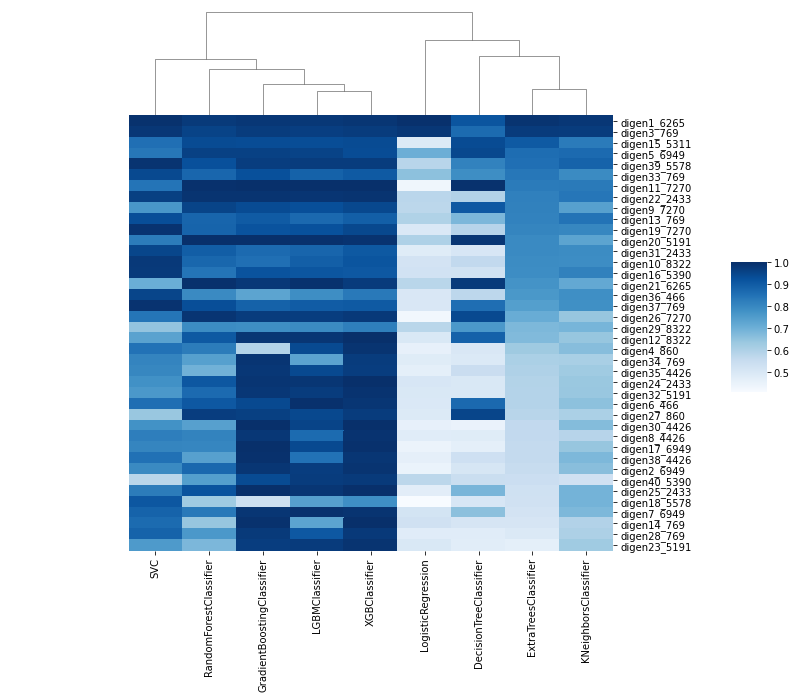

In [23]:
benchmark.plot_heatmap(new_results=results)

(<Figure size 1800x864 with 1 Axes>,
 <AxesSubplot:xlabel='Classifiers', ylabel='Difference vs AUROC per dataset'>)

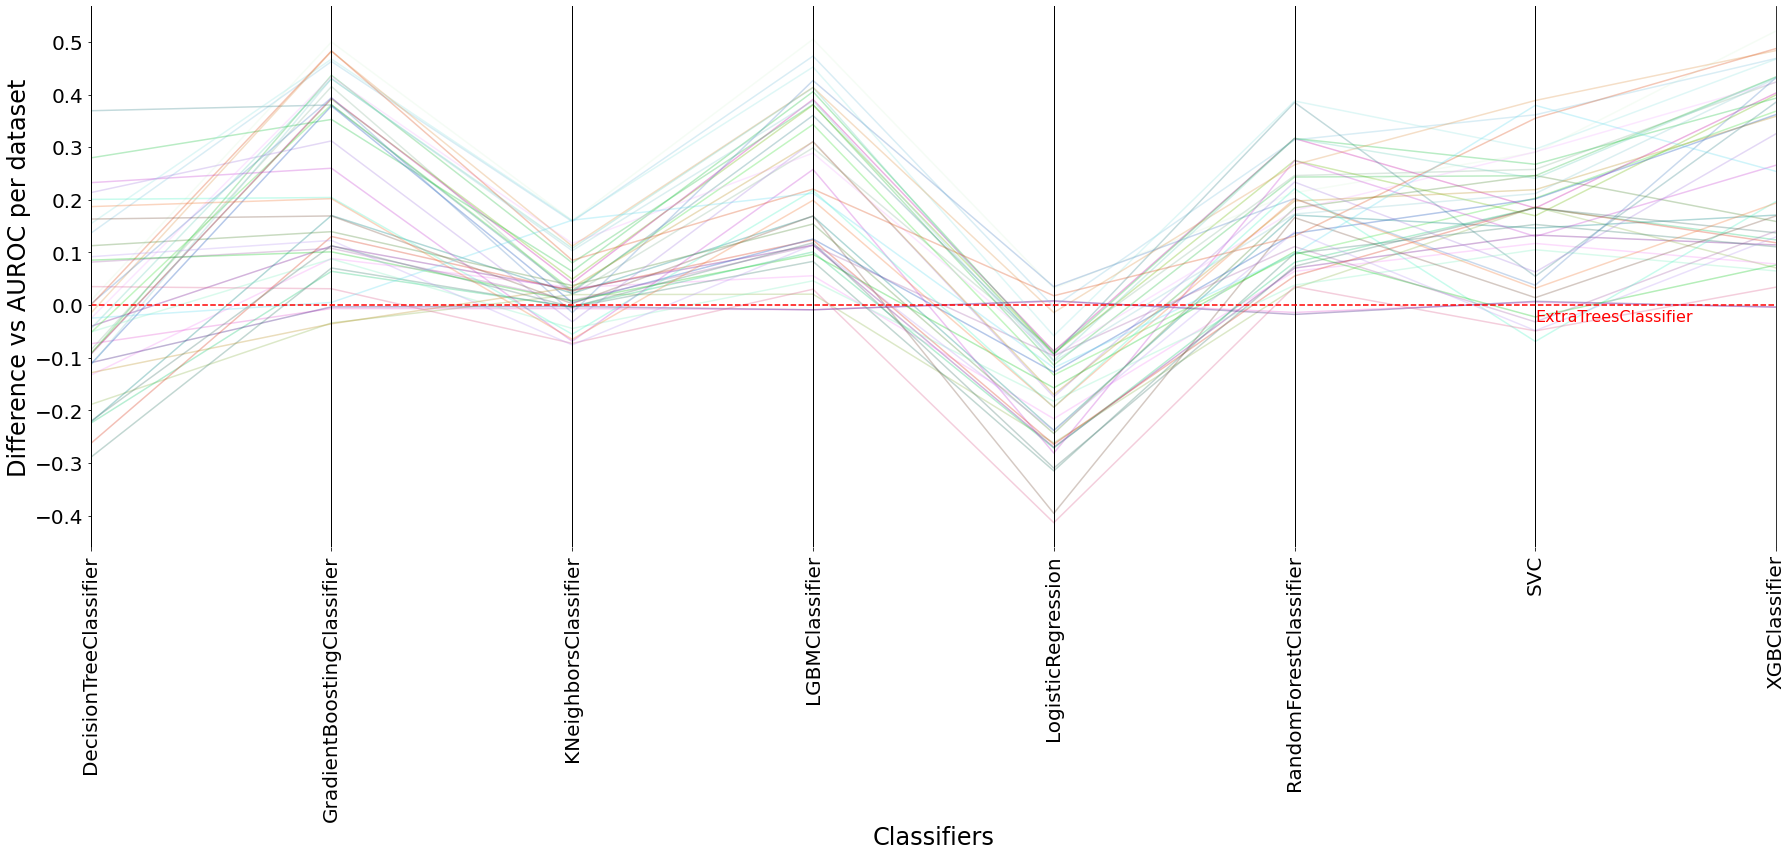

In [24]:
benchmark.plot_parallel_coordinates(new_results=results)

We can further explore the results by subsetting using a dataset parameter, e.g.:

(<Figure size 1800x864 with 1 Axes>,
 <AxesSubplot:xlabel='Classifiers', ylabel='Difference vs AUROC per dataset'>)

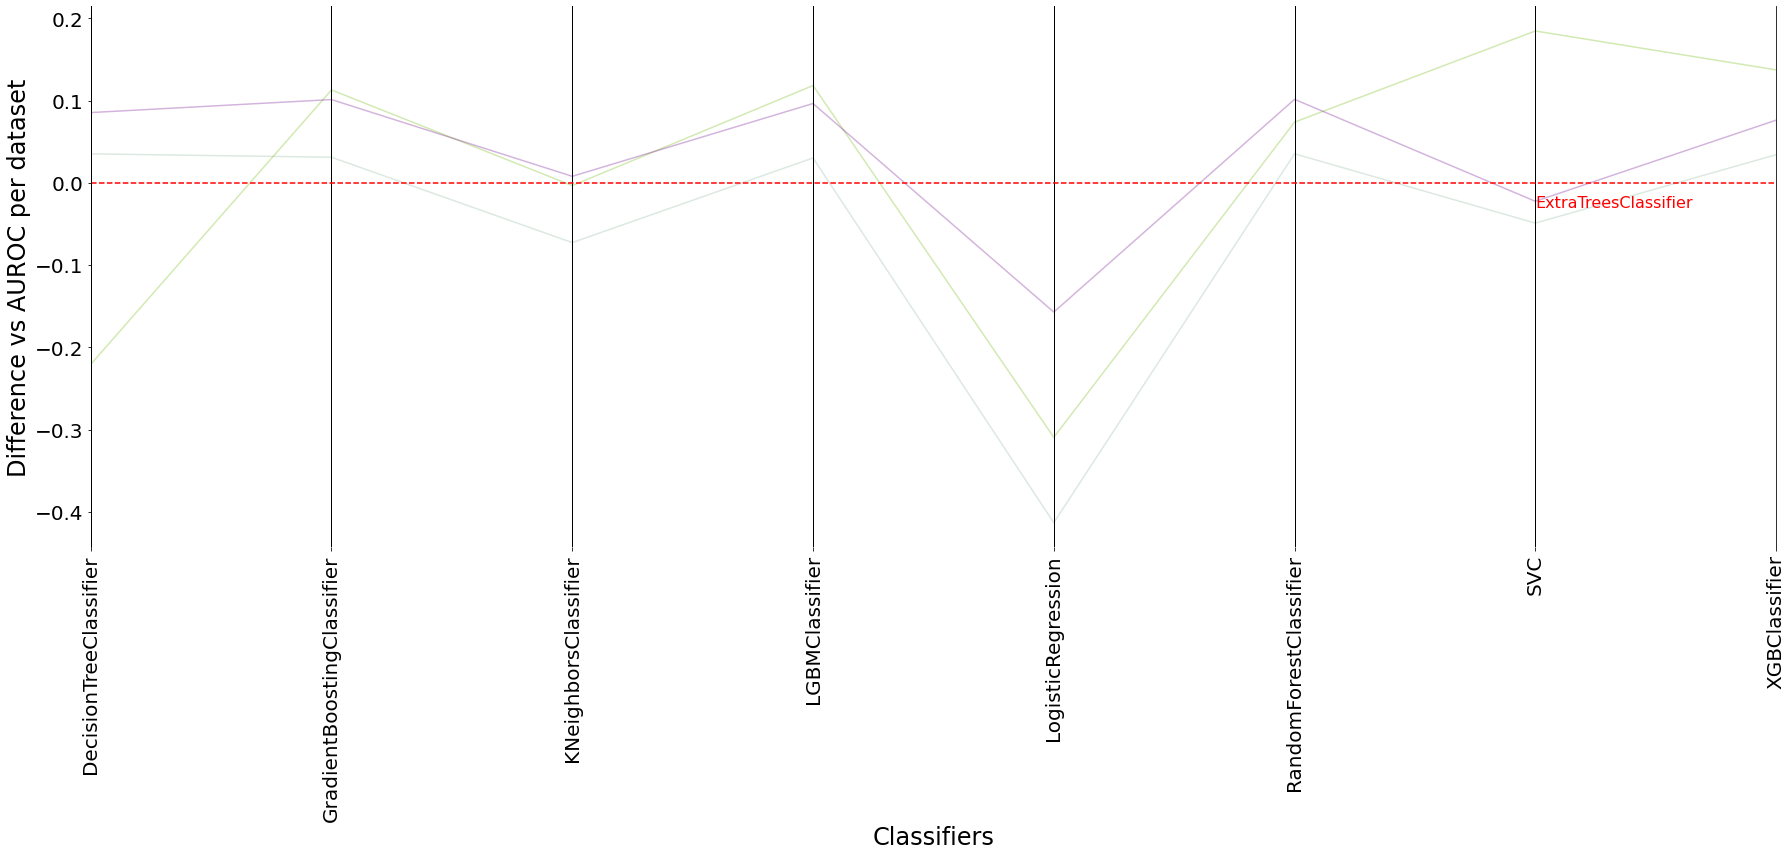

In [25]:
benchmark.plot_parallel_coordinates(new_results=results, datasets=['digen15','digen19','digen5_6949'])

Finally, we can compare direct performance per given dataset using ROC and PRC charts

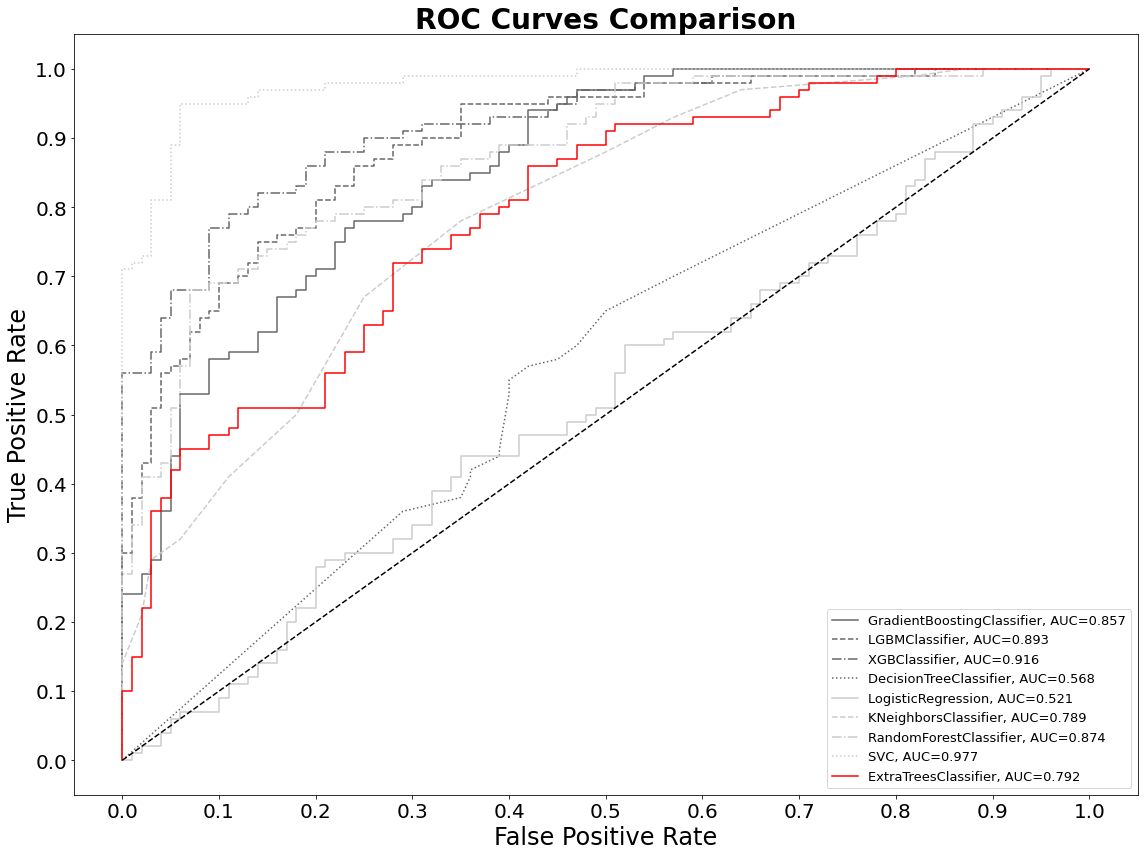

In [26]:
fig,ax=benchmark.plot_roc(dataset_name='digen10_8322', new_results=results)

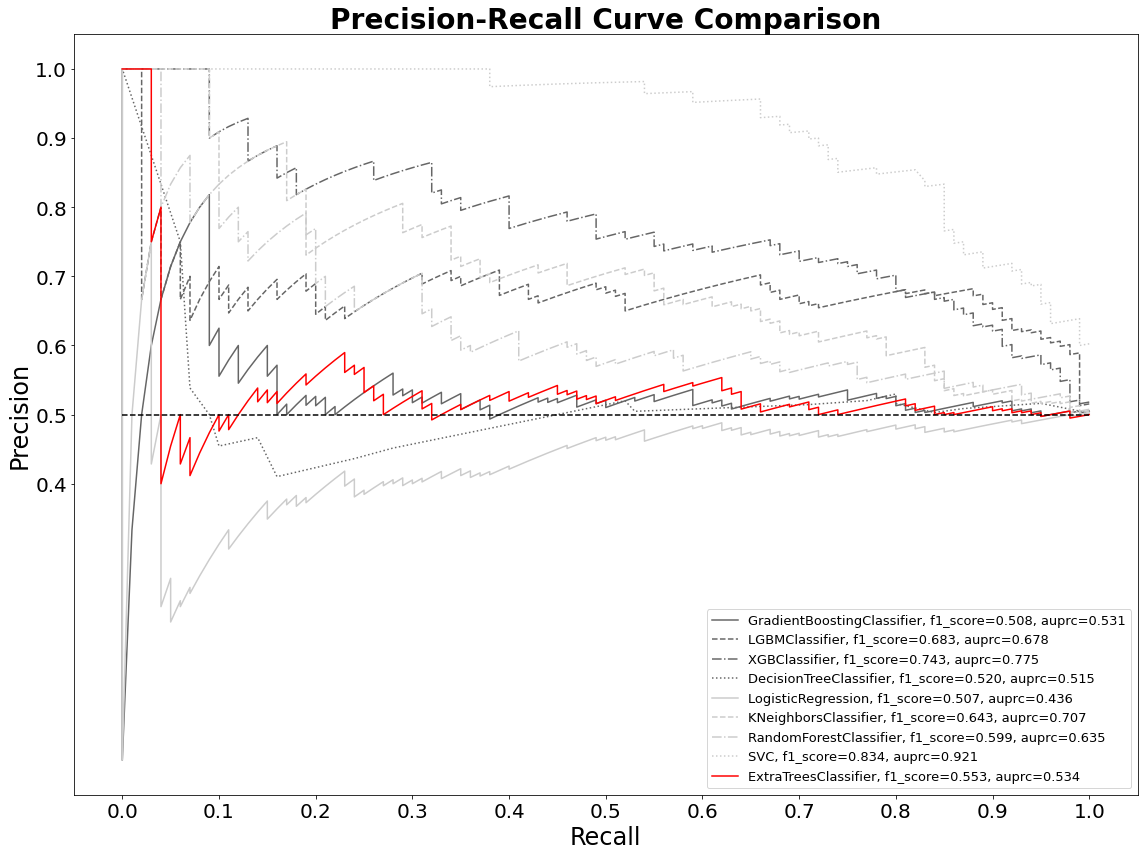

In [27]:
fig,ax=benchmark.plot_prc('digen18_5578', new_results=results)

Thank you for using our tutorial. 

For comments, suggestions etc. please use our GitHub page: https://github.com/EpistasisLab/digen/

In order to report bugs or to request new features, please use: https://github.com/EpistasisLab/digen/issues